In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('combine_19_20_21_sale.xlsx')

In [3]:
df.head()

,Unnamed: 0,Created Date,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income
0,0,2019-01-03,68,90,42,6583.000000,100885.000000,100885.0
1,1,2019-01-04,69,85,46,6542.500000,112823.177778,25694.2
2,2,2019-01-05,53,82,22,11057.800000,92705.000000,92705.0
3,3,2019-01-06,58,16,12,5815.000000,41483.776667,14062.0
4,4,2019-01-07,60,89,63,7918.583333,108119.473333,109814.0


In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.columns

Index(['Created Date', 'TMAX', 'Completed_Jobs', 'tech_count', 'Avg_Sales',
       'Zip_income', 'Income'],
      dtype='object')

In [6]:
df['year'] = df['Created Date'].dt.year
df['month'] = df['Created Date'].dt.month
df['day'] = df['Created Date'].dt.month


df['weekday'] = df['Created Date'].dt.dayofweek

df['quarter'] = df['Created Date'].dt.quarter

In [7]:
df=df.drop(['Created Date'],axis=1)

In [8]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [9]:
encode(df,'month',12)
encode(df,'day',365)
encode(df,'weekday',7)
encode(df,'quarter',4)

,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income,year,month,day,weekday,quarter,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,quarter_sin,quarter_cos
0,68,90,42,6583.000000,100885.000000,100885.00,2019,1,1,3,1,0.500000,0.866025,0.017213,0.999852,0.433884,-0.900969,1.000000e+00,6.123234e-17
1,69,85,46,6542.500000,112823.177778,25694.20,2019,1,1,4,1,0.500000,0.866025,0.017213,0.999852,-0.433884,-0.900969,1.000000e+00,6.123234e-17
2,53,82,22,11057.800000,92705.000000,92705.00,2019,1,1,5,1,0.500000,0.866025,0.017213,0.999852,-0.974928,-0.222521,1.000000e+00,6.123234e-17
3,58,16,12,5815.000000,41483.776667,14062.00,2019,1,1,6,1,0.500000,0.866025,0.017213,0.999852,-0.781831,0.623490,1.000000e+00,6.123234e-17
4,60,89,63,7918.583333,108119.473333,109814.00,2019,1,1,0,1,0.500000,0.866025,0.017213,0.999852,0.000000,1.000000,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,81,222,126,3494.939333,210099.110000,210099.11,2021,4,4,4,2,0.866025,-0.500000,0.068802,0.997630,-0.433884,-0.900969,1.224647e-16,-1.000000e+00
722,68,168,75,4079.521639,119775.950000,119775.95,2021,5,5,5,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00
723,69,202,124,3481.447857,230699.430000,230699.43,2021,5,5,2,2,0.500000,-0.866025,0.085965,0.996298,0.974928,-0.222521,1.224647e-16,-1.000000e+00
724,68,109,75,4314.042857,112431.950000,112431.95,2021,5,5,5,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00


In [10]:
df=df.drop(['month', 'day', 'weekday', 'quarter'],axis=1)

In [11]:
df['year'] = df['year'].map({2019: 0, 2020: 1,2021:2})

In [12]:
df['f1']=np.abs(df['Completed_Jobs'])*np.abs(df['Zip_income'])
df['f2']=np.sqrt(df['Completed_Jobs']**3)*np.abs(df['Avg_Sales'])
df['f3']=np.abs(np.sqrt(df['Completed_Jobs']) - np.sqrt(df['tech_count']))
df['f4']=np.log(np.sqrt(df['Completed_Jobs'])*df['TMAX']**3)

In [13]:
df1=df[['f1', 'f2','f3', 'f4','year',  'month_cos',  'quarter_sin','Income']]

In [14]:
train=df1[0:600]
test=df1[600:]

In [15]:
y=train['Income']
X=train.drop(['Income'],axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import xgboost as xgb
xgbst_reg=xgb.XGBRegressor()

In [18]:
xgbst_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
xgbst_reg.score(X_train,y_train)

0.9997636754227742

In [20]:
xgbst_reg.score(X_test,y_test)

0.6015674370059175

In [21]:
y_=test['Income']
X_=test.drop(['Income'],axis=1)

In [22]:
X_

,f1,f2,f3,f4,year,month_cos,quarter_sin
600,8.641438e+06,2.325629e+06,3.439976,15.624170,1,1.000000,-2.449294e-16
601,7.790484e+06,2.255753e+06,3.171302,15.264951,1,1.000000,-2.449294e-16
602,5.657075e+06,1.776562e+06,2.380652,14.701497,1,1.000000,-2.449294e-16
603,1.076714e+07,7.114696e+06,2.189750,14.269537,1,1.000000,-2.449294e-16
604,1.135843e+07,5.079207e+06,3.989318,14.754715,1,1.000000,-2.449294e-16
...,...,...,...,...,...,...,...
721,4.664200e+07,1.156030e+07,3.674692,15.884686,2,-0.500000,1.224647e-16
722,2.012236e+07,8.883276e+06,4.301227,15.220505,2,-0.866025,1.224647e-16
723,4.660128e+07,9.995096e+06,3.077142,15.356453,2,-0.866025,1.224647e-16
724,1.225508e+07,4.909352e+06,1.780052,15.004197,2,-0.866025,1.224647e-16


In [77]:
y_.median()

82920.44

In [23]:
xgbst_reg.score(X_,y_)

0.6327156744127413

In [24]:
y_pred=xgbst_reg.predict(X_)

In [25]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_,y_pred)))

MAE: 25240.07736614893
RMSE: 34385.69248149109


In [26]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

<AxesSubplot:>

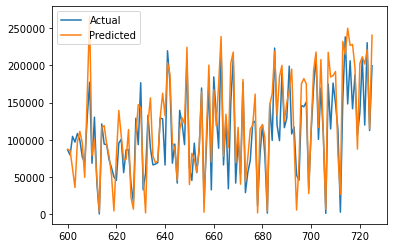

In [27]:
comp.plot()

# Hyper Parameter tuning

In [28]:
# Hyperparameter tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV


In [29]:
# Hyparameter ranges 

from scipy.stats import randint


parameters = {'n_estimators': randint(100,1200),
               'learning_rate': [0.001,0.002,0.003,0.005,0.01,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6],
               'max_depth': randint(5,40),
               'subsample': [0.5,0.6,0.7,0.8],
               'min_child_weight': randint(1,10)  }


In [30]:
# Model for tuning

base_learner=xgb.XGBRegressor()


In [31]:
# Tuning 

tuned_model= RandomizedSearchCV(estimator = base_learner, param_distributions = parameters,scoring='neg_root_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [32]:
tuned_model.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.4min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000209EDE57358>,
                                        'min_child_weight': <

In [30]:
# Best model

best_model=xgb.XGBRegressor(eta =0.1, max_depth=6, min_child_weight=1,n_estimators=100)


In [31]:
best_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
best_model.score(X_train,y_train)

0.9803965808797281

In [33]:
best_model.score(X_test,y_test)

0.6432872802902958

In [34]:
best_model.score(X_,y_)

0.4670062304606598

In [35]:
X_

,f1,f2,f3,f4,year,month_cos,quarter_sin
600,8.641438e+06,2.325629e+06,3.439976,15.624170,1,1.000000,-2.449294e-16
601,7.790484e+06,2.255753e+06,3.171302,15.264951,1,1.000000,-2.449294e-16
602,5.657075e+06,1.776562e+06,2.380652,14.701497,1,1.000000,-2.449294e-16
603,1.076714e+07,7.114696e+06,2.189750,14.269537,1,1.000000,-2.449294e-16
604,1.135843e+07,5.079207e+06,3.989318,14.754715,1,1.000000,-2.449294e-16
...,...,...,...,...,...,...,...
721,4.664200e+07,1.156030e+07,3.674692,15.884686,2,-0.500000,1.224647e-16
722,2.012236e+07,8.883276e+06,4.301227,15.220505,2,-0.866025,1.224647e-16
723,4.660128e+07,9.995096e+06,3.077142,15.356453,2,-0.866025,1.224647e-16
724,1.225508e+07,4.909352e+06,1.780052,15.004197,2,-0.866025,1.224647e-16


In [36]:
y_pred_1=best_model.predict(X_)

In [37]:
comp_2=pd.DataFrame({'Actual':y_,'Predicted':y_pred_1})

<AxesSubplot:>

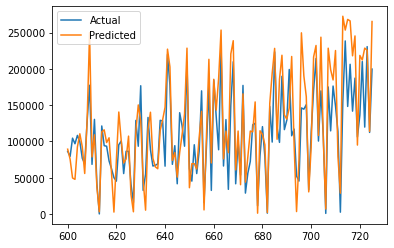

In [38]:
comp_2.plot()

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_, y_pred_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_,y_pred_1)))

MAE: 29834.026964944504
RMSE: 41422.6275355331
